### Read in the data exported from Athena/Periscope


In [1]:
import pandas as pd

# rentals = pd.read_csv('UntitledChart_2019-6-4_1358.csv')
rentals = pd.read_csv('UntitledChart_2019-6-7_1531.csv')

# create a new column with the timestamp correctly parsed as UTC and then converted to Madrid
rentals['booked_at'] = pd.to_datetime(rentals['object_data-rental_booked_at']).dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')
rentals['end_datetime'] = pd.to_datetime(rentals['object_data-rental_ended_at']).dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')
rentals.drop(['object_data-rental_booked_at', 'object_data-rental_ended_at'], axis=1, inplace=True)  # remove the original column
rentals.rename(columns={'object_data-customer_id': 'customer_id'}, inplace=True)

rentals.head()

,customer_id,booked_at,end_datetime
0,228996,2019-05-29 17:39:24.026685+02:00,2019-05-29 18:04:27.652201+02:00
1,180038,2019-05-29 18:00:56.419880+02:00,2019-05-29 18:15:29.491876+02:00
2,6813,2019-05-20 14:50:08.289332+02:00,2019-05-20 14:51:47.299094+02:00
3,223781,2019-05-20 23:41:41.834583+02:00,2019-05-20 23:42:05.264161+02:00
4,25837,2019-05-30 06:39:54.681279+02:00,2019-05-30 06:57:39.689848+02:00


In [2]:
# helpful columns which we will group by
# rentals['hour'] = rentals['booked_at'].dt.hour
# rentals['day of week'] = rentals['booked_at'].dt.weekday
# rentals['month'] = rentals['booked_at'].dt.month

In [3]:
rentals.head()

,customer_id,booked_at,end_datetime
0,228996,2019-05-29 17:39:24.026685+02:00,2019-05-29 18:04:27.652201+02:00
1,180038,2019-05-29 18:00:56.419880+02:00,2019-05-29 18:15:29.491876+02:00
2,6813,2019-05-20 14:50:08.289332+02:00,2019-05-20 14:51:47.299094+02:00
3,223781,2019-05-20 23:41:41.834583+02:00,2019-05-20 23:42:05.264161+02:00
4,25837,2019-05-30 06:39:54.681279+02:00,2019-05-30 06:57:39.689848+02:00


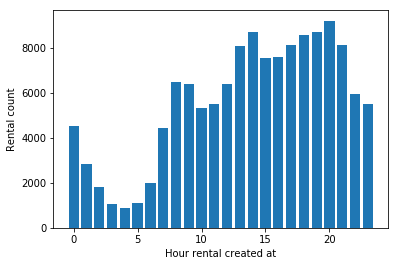

In [13]:
import matplotlib.pyplot as plt


by_hour = rentals['booked_at'].dt.hour.value_counts()
by_hour.sort_index(inplace=True)
plt.bar(by_hour.index, by_hour.values)
plt.xlabel('Hour rental created at')
plt.ylabel('Rental count')
plt.show()

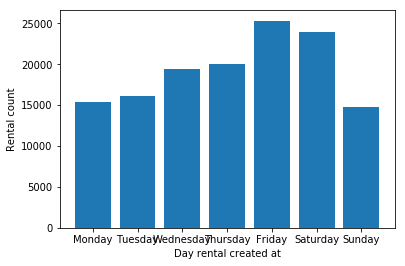

In [24]:
by_day = rentals['booked_at'].dt.weekday_name.value_counts()
# by_day.sort_index(inplace=True)
by_day = by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.bar(by_day.index, by_day.values)
plt.xlabel('Day rental created at')
plt.ylabel('Rental count')
plt.show()